<a href="https://colab.research.google.com/github/phanthuyanh/Data-Mining/blob/main/Stress_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##APA
Martire, V. L., Caruso, D., Palagini, L., Zoccoli, G., & Bastianini S. (2020). Stress & sleep: A relationship lasting a lifetime. *Neuroscience & Biobehavioral Reviews*, 117, 65-77. https://doi.org/10.1016/j.neubiorev.2019.08.024.

Rachakonda, L., Bapatla, A. K., Mohanty, S. P., & Kougianos, E. (2020). Sayopillow: a blockchain-enabled, privacy-assured framework for stress detection, prediction and control considering sleeping habits in the IomT. National Science Foundation. https://par.nsf.gov/servlets/purl/10247733



##Business Understanding: Relationship between Stress and Sleep
Many studies have pointed out the deeply-connected and two-way relationship between stress and sleep (Martire et. al, 2020). Based on the context provided for this dataset, being able to monitor and measure the physiological patterns and habits in sleep could assist with detecting stressed conditions. This could serve as the foundation for further diagnosis to detect stressors and provide timely treatment and adjustments to people's lifestyle.

The prediction of stress levels based on sleep patterns and habits also provides business opportunity to develop highly tech-driven self-monitoring tools, which could be more friendly and portable towards individuals with non-technical or non-medical background. One interesting example is SaYoPillow case, where the chosen dataset also came from (Rachakonda et. al, 2020).


In [19]:
#k-nearest Neighbor Model
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas.api.types import CategoricalDtype
from IPython.display import display, Markdown
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

##Data Understanding
The dataset is obtaining from a research project of a Smart Yoga Pillow of the  IEEE Transactions on Consumer Electronics.

General overview of the dataset as well as its independent and dependent variables is obtained using .info()

In [2]:
url = "https://raw.githubusercontent.com/phanthuyanh/homework/main/SaYoPillow.csv"
rawDF=pd.read_csv(url)
rawDF.info()
rawDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


The use of pairplot point out noticeable correlations and patterns

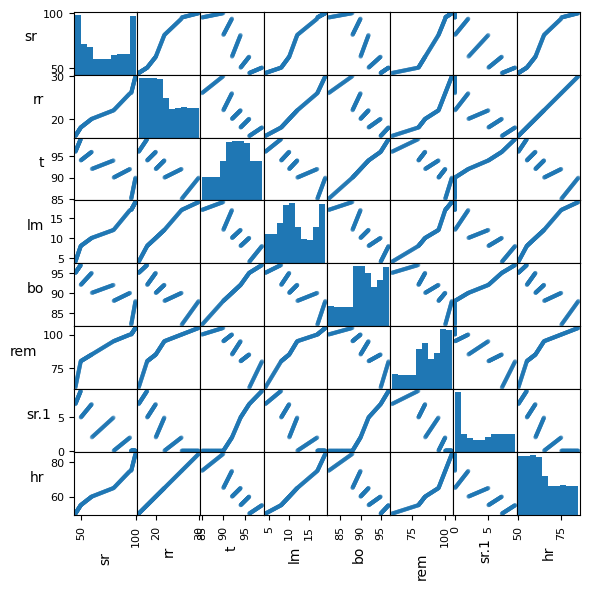

In [3]:
selDF = rawDF.iloc[:, :8]
fig = scatter_matrix(selDF, alpha=0.2, figsize=(6, 6), diagonal="hist")
for ax in fig.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [4]:
cntDiag = rawDF["sl"].value_counts()
propDiag = rawDF["sl"].value_counts(normalize=True)
cntDiag
propDiag

3    0.2
1    0.2
0    0.2
2    0.2
4    0.2
Name: sl, dtype: float64

##Data Preparation
As mentioned in the report, there are no missing values that needs to be processed. By changing the data type of the dependent variable Stress_level from object ot category, we can prevent potential issues during the modelling. As the stress level is more severe as the scale from 0-4 increases, so the order is set to "True"

In [5]:

catType = CategoricalDtype(categories=[0, 1,2,3,4], ordered=True)
rawDF["sl"] = rawDF["sl"].astype(catType)
rawDF["sl"]

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: sl, Length: 630, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

The data seems to not have much of the difference in the measuring scale.

In [6]:
rawDF[["sr","rr","t","lm","bo","rem","sr","hr"]].describe()

,sr,rr,t,lm,bo,rem,sr,hr
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,71.600000,64.500000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,19.372833,9.915277
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,45.000000,50.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,52.500000,56.250000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,70.000000,62.500000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,91.250000,72.500000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,100.000000,85.000000


Now the dataset is splitted into test and train set. 30% of the dataset will be used for testing, and the remaining 70% will be used for training.

In [7]:
excluded = ["sl"]  # list of columns to exclude
X = rawDF.drop(excluded, axis=1)
y = rawDF["sl"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_train.head()

,sr,rr,t,lm,bo,rem,sr.1,hr
573,55.36,19.072,95.072,9.072,93.608,82.68,6.072,57.68
88,92.48,25.328,91.664,16.160,89.664,99.16,1.664,73.32
526,79.52,21.952,93.952,11.952,91.952,94.76,4.928,64.88
117,76.00,21.600,93.600,11.600,91.600,93.00,4.400,64.00
424,48.52,17.408,98.112,6.816,96.408,74.08,8.408,53.52


##Modeling and Evaluation
Respectively, the KNN, NB, and Decision Tree are conducted and evaluated. For evaluation, a confusion matrix is displayed to compare the predicted values against the real value in the dataset, and wrapped up using the accuracy score.

###KNN Modeling and Evaluation

In [8]:
#KNN MODEL
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.iloc[:,:15], y_train)
y_pred = knn.predict((X_test.iloc[:,:15]))
y_pred

array([0, 3, 2, 0, 3, 2, 3, 1, 0, 0, 2, 4, 2, 2, 1, 4, 1, 4, 1, 2, 0, 0,
       4, 0, 0, 2, 4, 0, 2, 2, 2, 0, 2, 2, 4, 0, 3, 2, 3, 3, 4, 4, 1, 0,
       4, 1, 1, 3, 3, 3, 1, 3, 2, 3, 0, 1, 0, 1, 3, 0, 3, 3, 0, 2, 0, 1,
       4, 2, 3, 0, 2, 3, 1, 4, 3, 4, 3, 1, 2, 3, 3, 4, 3, 4, 1, 4, 2, 2,
       1, 3, 4, 1, 2, 4, 4, 2, 4, 4, 2, 4, 4, 0, 1, 2, 1, 1, 1, 1, 3, 1,
       2, 4, 1, 3, 0, 0, 1, 0, 4, 0, 2, 3, 2, 2, 4, 3, 0, 0, 1, 2, 1, 0,
       3, 0, 2, 0, 0, 0, 2, 1, 2, 4, 2, 0, 4, 0, 1, 1, 0, 1, 3, 0, 4, 3,
       3, 4, 3, 1, 3, 2, 0, 0, 2, 2, 4, 2, 4, 1, 2, 1, 0, 3, 4, 2, 1, 0,
       4, 2, 0, 3, 3, 1, 4, 4, 2, 3, 4, 1, 3])

In [9]:
y_test

497    0
244    3
552    2
213    0
549    3
      ..
92     2
499    3
68     4
15     1
199    3
Name: sl, Length: 189, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [10]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

array([[39,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0],
       [ 0,  0, 41,  0,  0],
       [ 0,  0,  0, 37,  0],
       [ 0,  0,  0,  0, 36]])

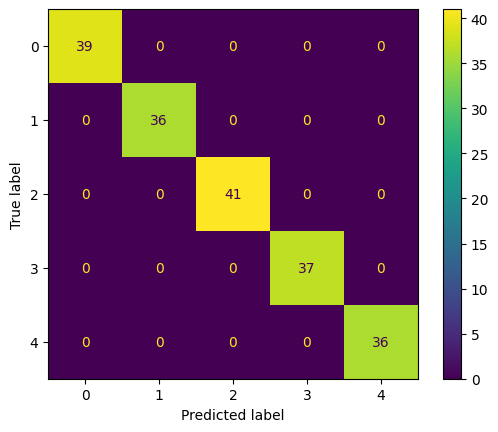

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [12]:
#Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

###NB Modeling and Evaluation

In [13]:
X1 = rawDF.drop(excluded, axis=1)
y1 = rawDF["sl"]
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.3, random_state=42
)


In [14]:
nb = GaussianNB()
nb.fit(X1_train.iloc[:,:15], y1_train)
y_nb_predict = nb.predict((X1_test.iloc[:,:15]))
y_nb_predict

array([0, 3, 2, 0, 3, 2, 3, 1, 0, 0, 2, 4, 2, 2, 1, 4, 1, 4, 1, 2, 0, 0,
       4, 0, 0, 2, 4, 0, 2, 2, 2, 0, 2, 2, 4, 0, 3, 2, 3, 3, 4, 4, 1, 0,
       4, 1, 1, 3, 3, 3, 1, 3, 2, 3, 0, 1, 0, 1, 3, 0, 3, 3, 0, 2, 0, 1,
       4, 2, 3, 0, 2, 3, 1, 4, 3, 4, 3, 1, 2, 3, 3, 4, 3, 4, 1, 4, 2, 2,
       1, 3, 4, 1, 2, 4, 4, 2, 4, 4, 2, 4, 4, 0, 1, 2, 1, 1, 1, 1, 3, 1,
       2, 4, 1, 3, 0, 0, 1, 0, 4, 0, 2, 3, 2, 2, 4, 3, 0, 0, 1, 2, 1, 0,
       3, 0, 2, 0, 0, 0, 2, 1, 2, 4, 2, 0, 4, 0, 1, 1, 0, 1, 3, 0, 4, 3,
       3, 4, 3, 1, 3, 2, 0, 0, 2, 2, 4, 2, 4, 1, 2, 1, 0, 3, 4, 2, 1, 0,
       4, 2, 0, 3, 3, 1, 4, 4, 2, 3, 4, 1, 3])

In [15]:
y1_test

497    0
244    3
552    2
213    0
549    3
      ..
92     2
499    3
68     4
15     1
199    3
Name: sl, Length: 189, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [16]:
cm1 = confusion_matrix(y1_test, y_nb_predict, labels=nb.classes_)
cm1

array([[39,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0],
       [ 0,  0, 41,  0,  0],
       [ 0,  0,  0, 37,  0],
       [ 0,  0,  0,  0, 36]])

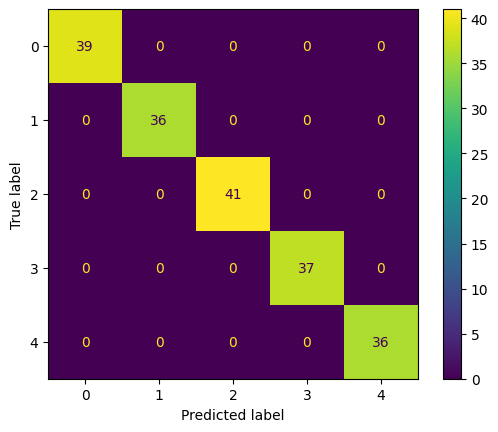

In [17]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=nb.classes_)
disp1.plot()
plt.show()

###Decision Tree Modeling and Evaluation

---



In [18]:
y2= rawDF['sl']
X2= rawDF.drop(excluded, axis =1)
X2_train, X2_test, y2_train, y2_test= train_test_split(X2, y2, test_size=0.3, random_state=42)

In [21]:
#define the classification algorithm
dt_clsf=tree.DecisionTreeClassifier(max_depth=2, criterion ="entropy")
dt_clsf=dt_clsf.fit(X2_train, y2_train)
#generating predictions
Y2_predict=dt_clsf.predict(X2_test)

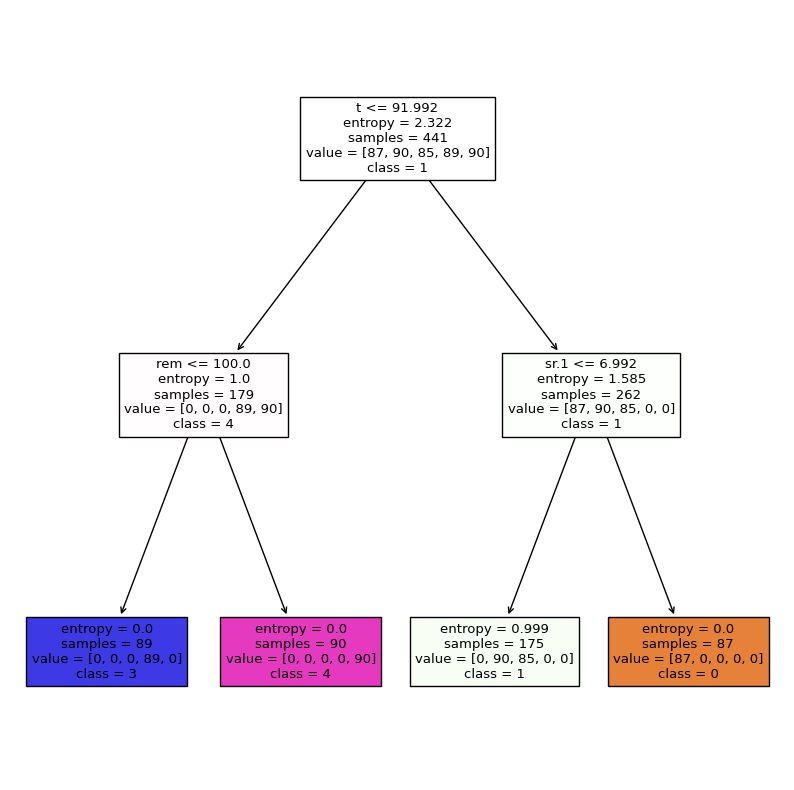

In [22]:
#Plotting decision tree
feature_names=['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr']
class_names=['0', '1', '2', '3','4']
fig2 = plt.figure(figsize = (10,10))
plot2 = tree.plot_tree(dt_clsf, feature_names= feature_names, class_names= class_names, filled=True )

In [23]:
cm2 = confusion_matrix(y2_test, Y2_predict, labels = dt_clsf.classes_ )

<function matplotlib.pyplot.show(close=None, block=None)>

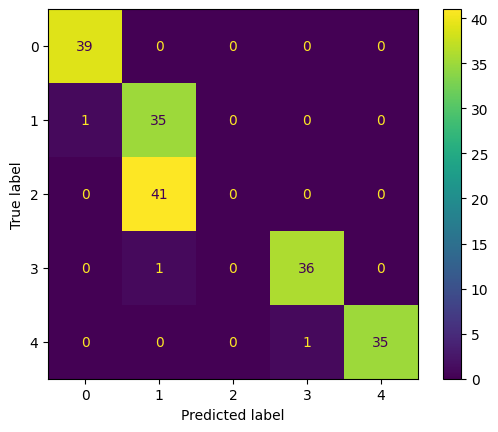

In [24]:
display2 = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels =  dt_clsf.classes_)
display2.plot()
plt.show

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_predict)

0.7724867724867724